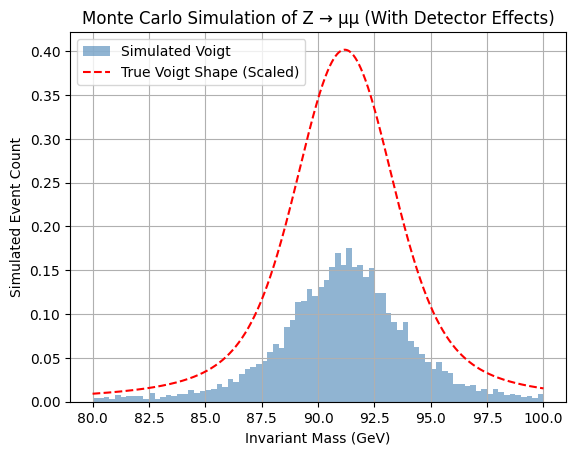

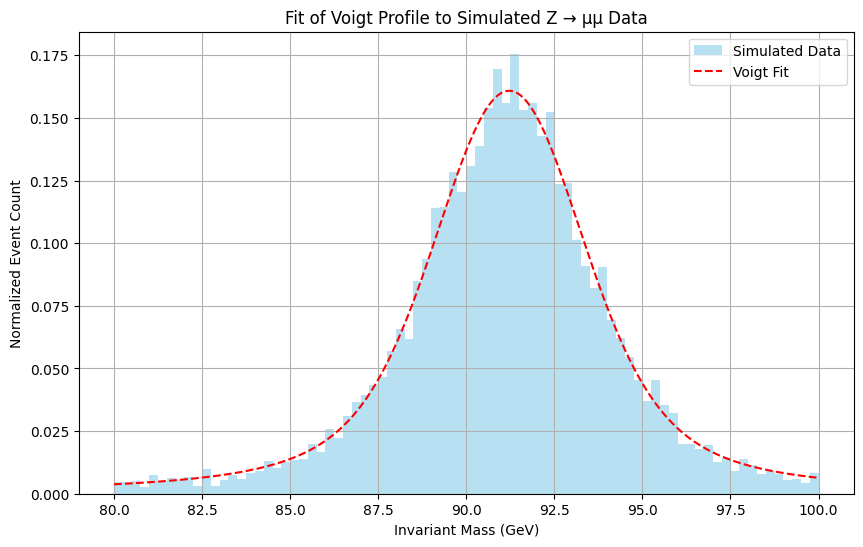

Fitted Parameters from Monte Carlo Simulation:
μ (mean)     = 91.2182 GeV
σ (Gaussian) = 1.5586 GeV
γ (Lorentzian) = 1.2934 GeV
Amplitude     = 1.0950


In [ ]:
from scipy.special import wofz
import numpy as np

def voigt_pdf(x, mu, sigma, gamma):
    z = ((x - mu) + 1j*gamma) / (sigma * np.sqrt(2))
    return np.real(wofz(z)) / (sigma * np.sqrt(2*np.pi))

# Parameters
mu = 91.1876
gamma = 2.495 / 2       # HWHM of Z decay width
sigma = 1.598           # Detector resolution from your fit

# Mass range and probability distribution
x_vals = np.linspace(80, 100, 1000)
voigt_probs = voigt_pdf(x_vals, mu, sigma, gamma)
voigt_probs /= voigt_probs.sum()  # Normalize

# Generate Monte Carlo sample
n_events = 10000
samples = np.random.choice(x_vals, size=n_events, p=voigt_probs)

import matplotlib.pyplot as plt

plt.hist(samples, bins=80, range=(80, 100), alpha=0.6, label='Simulated Voigt', color='steelblue', density=True)
plt.plot(x_vals, voigt_probs * n_events / 80, 'r--', label='True Voigt Shape (Scaled)')
plt.xlabel("Invariant Mass (GeV)")
plt.ylabel("Simulated Event Count")
plt.title("Monte Carlo Simulation of Z → μμ (With Detector Effects)")
plt.legend()
plt.grid(True)
plt.show()

from scipy.optimize import curve_fit

# --- Define Voigt profile as fit function ---
def voigt_func(x, mu, sigma, gamma, amplitude):
    z = ((x - mu) + 1j * gamma) / (sigma * np.sqrt(2))
    return amplitude * np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))

# --- Create histogram from samples ---
hist_vals, bin_edges = np.histogram(samples, bins=80, range=(80, 100), density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# --- Initial parameter guesses ---
initial_guess = [91.1876, 1.5, 1.42475, 0.15] # mu, sigma, gamma, amplitude

# --- Fit histogram to Voigt profile ---
popt, pcov = curve_fit(voigt_func, bin_centers, hist_vals, p0=initial_guess)
mu_fit, sigma_fit, gamma_fit, amp_fit = popt

# --- Extract fitted parameters ---
mu_fit, sigma_fit, gamma_fit, amp_fit = popt

# --- Plot the fit over histogram ---
x_fit = np.linspace(80, 100, 1000)
y_fit = voigt_func(x_fit, *popt)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=80, range=(80, 100), density=True, alpha=0.6, label='Simulated Data', color='skyblue')
plt.plot(x_fit, y_fit, 'r--', label='Voigt Fit')
plt.xlabel("Invariant Mass (GeV)")
plt.ylabel("Normalized Event Count")
plt.title("Fit of Voigt Profile to Simulated Z → μμ Data")
plt.legend()
plt.grid(True)
plt.show()
print("Fitted Parameters from Monte Carlo Simulation:")
print(f"μ (mean)     = {mu_fit:.4f} GeV")
print(f"σ (Gaussian) = {sigma_fit:.4f} GeV")
print(f"γ (Lorentzian) = {gamma_fit:.4f} GeV")
print(f"Amplitude     = {amp_fit:.4f}")



